In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
matplotlib.style.use('seaborn-notebook')
pd.set_option('precision', 3)

## Data loading

In [3]:
#load the boston house data
boston_house = load_boston()

### boston data is a dictionary, so we can get an idea about the data structure using keys

In [4]:
print(boston_house.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


#### 'DESCR' feature provided a complete description of the data being loaded

In [5]:
print(boston_house['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Convert data to dataframe for easier analysis

In [6]:
features_lowercase = [feature.lower() for feature in boston_house['feature_names']]  #make all features lower case
df_boston = pd.DataFrame(data=boston_house['data'], columns=features_lowercase)
df_boston['price'] = boston_house['target']

In [7]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98,24.0
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14,21.6
2,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03,34.7
3,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94,33.4
4,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33,36.2


## Data Review

In [10]:
print(df_boston.describe())  #describe() provides a qucik statistical analysis of numerical features

          crim       zn    indus     chas      nox       rm      age      dis  \
count  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000   
mean     3.614   11.364   11.137    0.069    0.555    6.285   68.575    3.795   
std      8.602   23.322    6.860    0.254    0.116    0.703   28.149    2.106   
min      0.006    0.000    0.460    0.000    0.385    3.561    2.900    1.130   
25%      0.082    0.000    5.190    0.000    0.449    5.886   45.025    2.100   
50%      0.257    0.000    9.690    0.000    0.538    6.208   77.500    3.207   
75%      3.677   12.500   18.100    0.000    0.624    6.623   94.075    5.188   
max     88.976  100.000   27.740    1.000    0.871    8.780  100.000   12.127   

           rad      tax  ptratio        b    lstat    price  
count  506.000  506.000  506.000  506.000  506.000  506.000  
mean     9.549  408.237   18.456  356.674   12.653   22.533  
std      8.707  168.537    2.165   91.295    7.141    9.197  
min      1.000  187.00

In [11]:
print(df_boston.info())  #info() provides data type/quantyity for each column in dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        506 non-null float64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None


## Generate features (attributes/independent variables) and response (dependent variable) variables 

In [12]:
X = df_boston[df_boston.columns[:-1]]
y = df_boston[df_boston.columns[-1]]

### Check the Skewness of the features

-  Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
squashed in one direction or another.

- Many machine learning algorithms assume a Gaussian
distribution. 

- Knowing that an attribute has a skew may allow you to perform data preparation
to correct the skew and later improve the accuracy of your models. 

- You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.

In [13]:
skewness = X.skew()
print(skewness)

crim       5.223
zn         2.226
indus      0.295
chas       3.406
nox        0.729
rm         0.404
age       -0.599
dis        1.012
rad        1.005
tax        0.670
ptratio   -0.802
b         -2.890
lstat      0.906
dtype: float64


You can also plot the destribution of the features to visualize their skewness

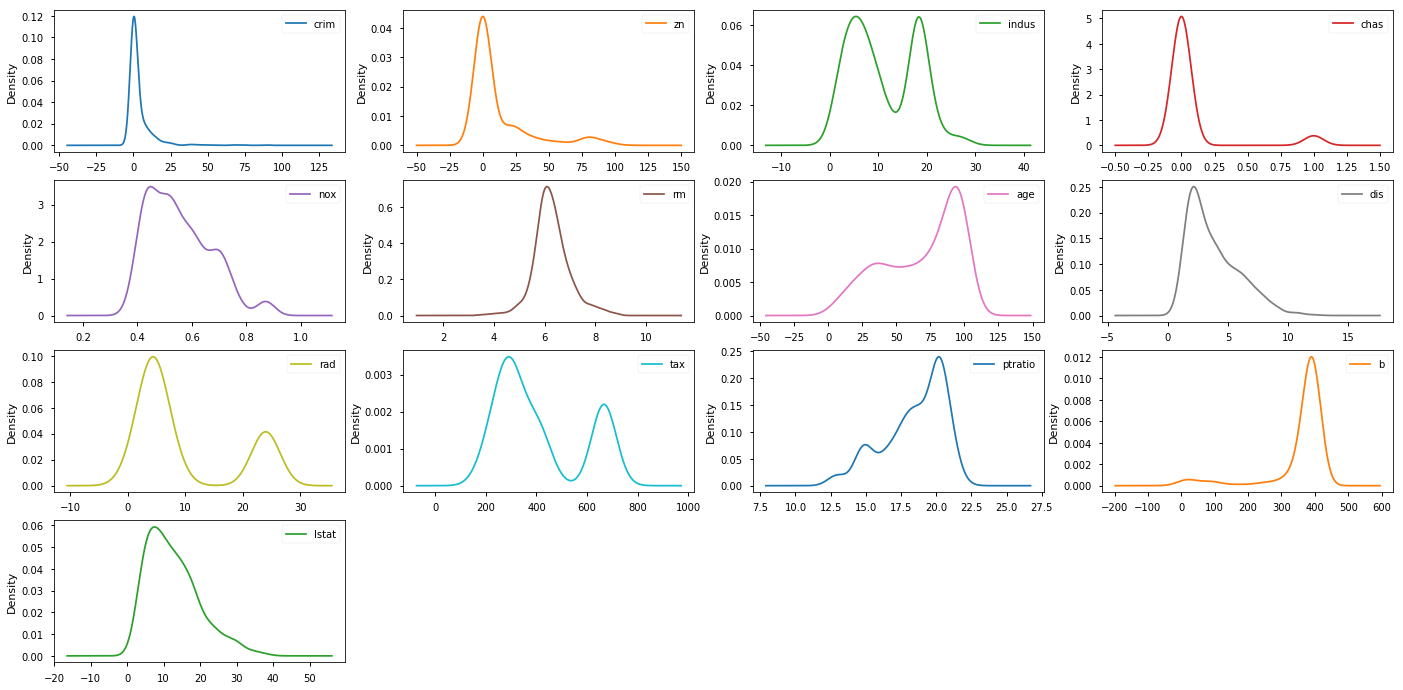

In [26]:
X.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(24,12));

### Check for the correlation between attributes

-  Correlation refers to the relationship between two variables and how they may or may not change together. 

-  The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved.

-  A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no
correlation at all.

-  Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset. 

In [27]:
correlations = X.corr(method='pearson')

In [32]:
print(correlations)  # table values of correlations

          crim     zn  indus   chas    nox     rm    age    dis    rad    tax  \
crim     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583   
zn      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   
indus    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721   
chas    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   
nox      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668   
rm      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   
age      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506   
dis     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   
rad      0.626 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910   
tax      0.583 -0.315  0.721 -0.036  0.668 -0.292  0.506 -0.534  0.910  1.000   
ptratio  0.290 -0.392  0.383 -0.122  0.189 -0.356  0.262 -0.232  0.465  0.461   
b       -0.385  0.176 -0.357

### heatmap visualization of correlation between attributes

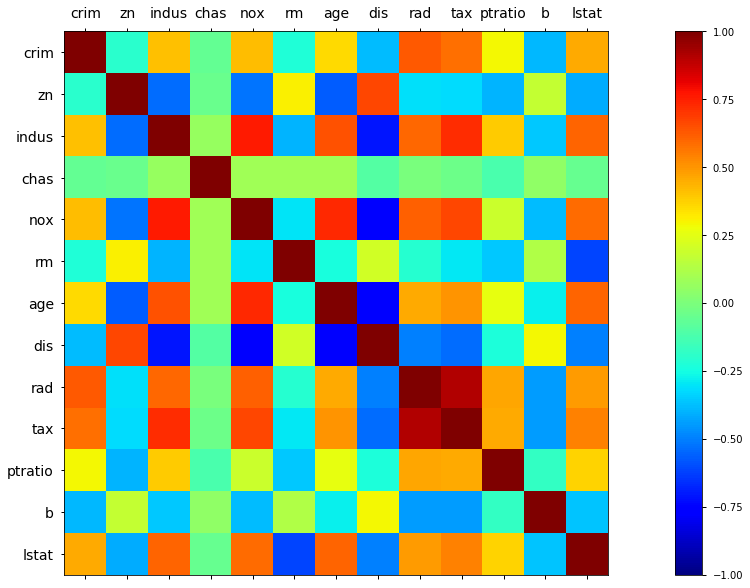

In [42]:
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111)
# get cmap from https://matplotlib.org/users/colormaps.html
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='jet')
fig.colorbar(cax)
ticks = np.arange(0, X.shape[1], 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns, fontsize=14)
ax.set_yticklabels(X.columns,fontsize=14);

In [ ]:
scatter_matrix(X, figsize=(24,10), alpha=0.5);